# Author : Karan Shingde

## Role : Data Scientist and Business Analysts

## Intern at TSF-GRIP October 2021 batch

# Task : Predict the percentage of student based on the numer of study hours

### From the given data, our task is to predict percentage of students based on the number of study hours.

### We will be using regression technique with the help of Python-SciKit Learn library for **Machine Learning** can be used to implement regression function.

### This is a simple linear regression task as it involves just two variables.

# Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# Collecting the data and coverting into CSV file

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset= pd.read_csv(url)
dataset.to_csv('student.csv', index=False)

In [3]:
# reading csv file
df = pd.read_csv('student.csv')

In [4]:
# first 5 records of the data
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


From above output we can say that there are no null values in the dataset

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


So, from this result the average hours of study in this dataset are 5 hours and average scores of the students are 51

# Data Visualization

Let's plot our data points on 2-D graph, so we can find relationship betwreen the data.

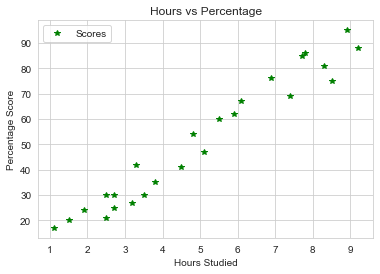

In [7]:
df.plot(x='Hours', y='Scores', style='*', color='green')
plt.title("Hours vs Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above, we can say that there is a positive linear relation between the number of hours studied and percentage of score

# Preprocessing of Data

In [8]:
# Dividing data into attributes and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Train Test Split of the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Let's check the shape

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(25, 1) (20, 1) (5, 1)


# Training the Algorithm

There are no need to use **StandardScaler** or **MinMaxScaler** scaling techniques, coz our data is small and values are not in wide range.

We are going to use **LinearRegression** to train our Algorithm

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Coefficient: [9.91065648]

Intercept: 2.018160041434683

Line of Regression:



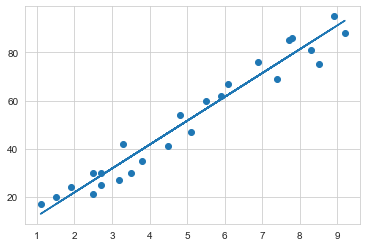

In [14]:
# Plotting the regression model
coef = model.coef_
print("Coefficient: {}".format(coef))
intercept = model.intercept_
print("\nIntercept: {}".format(intercept))
print("\nLine of Regression:\n")
line = coef*X + intercept # Line of regression

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line)
plt.show()

# Making Predictions

In [15]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Result of Actual vs Predicted
df2 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Sub Task : 

## What will be predicted score if a student studies for 9.25 hrs/day ?

In [17]:
hours = [[9.25]] # expected 2D array
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Model Evaluation

It's time to evaluation of model. Here we are using **Mean Absolute Error** technqiue to evaluate our regression model

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred).round(3) 
# 3 digits afer decimal is enough
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  4.184


# We are done with this task, Thank You!